In [2]:
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling

In [3]:
Covid_cases =pd.read_csv(r"C:\Users\mrkoh\Downloads\A-1covid-19\covid-19\cases.CSV")

In [4]:
Covid_cases.head()

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source,method_note
0,1,1,50-59,Male,Toronto,Ontario,Canada,2020-01-25,2020-01-19,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...,NaN,NaN,0.0
1,2,2,50-59,Female,Toronto,Ontario,Canada,2020-01-27,2020-01-26,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Travel and Close Contact,NaN,0.0
2,3,1,40-49,Male,Vancouver Coastal,BC,Canada,2020-01-28,2020-01-26,1,China,NaN,https://news.gov.bc.ca/releases/2020HLTH0015-0...,NaN,NaN,NaN
3,4,3,20-29,Female,Middlesex-London,Ontario,Canada,2020-01-31,2020-01-26,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...,NaN,NaN,0.0
4,5,2,50-59,Female,Vancouver Coastal,BC,Canada,2020-02-04,2020-02-02,0,NaN,Close Contact,https://news.gov.bc.ca/releases/2020HLTH0023-0...,The individual had close contact with family v...,NaN,NaN


In [5]:
print(Covid_cases.dtypes)

case_id                     int64
provincial_case_id          int64
age                        object
sex                        object
health_region              object
province                   object
country                    object
date_report                object
report_week                object
travel_yn                  object
travel_history_country     object
locally_acquired           object
case_source                object
additional_info            object
additional_source          object
method_note               float64
dtype: object


In [6]:
print(Covid_cases.isnull().values.sum())

57800


In [7]:
print(Covid_cases.isnull().values)

[[False False False ...  True  True False]
 [False False False ... False  True False]
 [False False False ...  True  True  True]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]


In [8]:
print(Covid_cases.isnull().sum())

case_id                       0
provincial_case_id            0
age                           0
sex                           0
health_region                 0
province                      0
country                       0
date_report                   0
report_week                   0
travel_yn                     0
travel_history_country    12417
locally_acquired          12639
case_source                   0
additional_info           11597
additional_source         11687
method_note                9460
dtype: int64


In [9]:
Covid_cases = Covid_cases.fillna(Covid_cases['travel_history_country'].value_counts().index[0])
Covid_cases = Covid_cases.fillna(Covid_cases['locally_acquired'].value_counts().index[0])
Covid_cases = Covid_cases.fillna(Covid_cases['additional_info'].value_counts().index[0])
Covid_cases = Covid_cases.fillna(Covid_cases['additional_source'].value_counts().index[0])
Covid_cases = Covid_cases.fillna(Covid_cases['method_note'].value_counts().index[0])

In [10]:
print(Covid_cases.isnull().sum())

case_id                   0
provincial_case_id        0
age                       0
sex                       0
health_region             0
province                  0
country                   0
date_report               0
report_week               0
travel_yn                 0
travel_history_country    0
locally_acquired          0
case_source               0
additional_info           0
additional_source         0
method_note               0
dtype: int64


In [11]:
Covid_cases_sklearn = Covid_cases.copy()

In [12]:
lb = LabelEncoder()

In [13]:
Covid_cases_sklearn['age'] = lb.fit_transform(Covid_cases['age'])

In [14]:
Covid_cases_sklearn.head()

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source,method_note
0,1,1,6,Male,Toronto,Ontario,Canada,2020-01-25,2020-01-19,1,China,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Not Reported,Not Reported,0
1,2,2,6,Female,Toronto,Ontario,Canada,2020-01-27,2020-01-26,1,China,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Travel and Close Contact,Not Reported,0
2,3,1,4,Male,Vancouver Coastal,BC,Canada,2020-01-28,2020-01-26,1,China,Not Reported,https://news.gov.bc.ca/releases/2020HLTH0015-0...,Not Reported,Not Reported,Not Reported
3,4,3,2,Female,Middlesex-London,Ontario,Canada,2020-01-31,2020-01-26,1,China,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Not Reported,Not Reported,0
4,5,2,6,Female,Vancouver Coastal,BC,Canada,2020-02-04,2020-02-02,0,Not Reported,Close Contact,https://news.gov.bc.ca/releases/2020HLTH0023-0...,The individual had close contact with family v...,Not Reported,Not Reported


In [15]:
Covid_cases_sklearn['sex'] = lb.fit_transform(Covid_cases['sex'])

In [16]:
Covid_cases_sklearn.head()

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source,method_note
0,1,1,6,1,Toronto,Ontario,Canada,2020-01-25,2020-01-19,1,China,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Not Reported,Not Reported,0
1,2,2,6,0,Toronto,Ontario,Canada,2020-01-27,2020-01-26,1,China,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Travel and Close Contact,Not Reported,0
2,3,1,4,1,Vancouver Coastal,BC,Canada,2020-01-28,2020-01-26,1,China,Not Reported,https://news.gov.bc.ca/releases/2020HLTH0015-0...,Not Reported,Not Reported,Not Reported
3,4,3,2,0,Middlesex-London,Ontario,Canada,2020-01-31,2020-01-26,1,China,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Not Reported,Not Reported,0
4,5,2,6,0,Vancouver Coastal,BC,Canada,2020-02-04,2020-02-02,0,Not Reported,Close Contact,https://news.gov.bc.ca/releases/2020HLTH0023-0...,The individual had close contact with family v...,Not Reported,Not Reported


In [17]:
Covid_cases_sklearn['health_region'] = lb.fit_transform(Covid_cases['health_region'])

Covid_cases_sklearn.head()

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source,method_note
0,1,1,6,1,66,Ontario,Canada,2020-01-25,2020-01-19,1,China,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Not Reported,Not Reported,0
1,2,2,6,0,66,Ontario,Canada,2020-01-27,2020-01-26,1,China,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Travel and Close Contact,Not Reported,0
2,3,1,4,1,67,BC,Canada,2020-01-28,2020-01-26,1,China,Not Reported,https://news.gov.bc.ca/releases/2020HLTH0015-0...,Not Reported,Not Reported,Not Reported
3,4,3,2,0,35,Ontario,Canada,2020-01-31,2020-01-26,1,China,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Not Reported,Not Reported,0
4,5,2,6,0,67,BC,Canada,2020-02-04,2020-02-02,0,Not Reported,Close Contact,https://news.gov.bc.ca/releases/2020HLTH0023-0...,The individual had close contact with family v...,Not Reported,Not Reported


In [18]:
Covid_cases_sklearn['province'] = lb.fit_transform(Covid_cases['province'])

Covid_cases_sklearn.head()

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source,method_note
0,1,1,6,1,66,7,Canada,2020-01-25,2020-01-19,1,China,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Not Reported,Not Reported,0
1,2,2,6,0,66,7,Canada,2020-01-27,2020-01-26,1,China,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Travel and Close Contact,Not Reported,0
2,3,1,4,1,67,1,Canada,2020-01-28,2020-01-26,1,China,Not Reported,https://news.gov.bc.ca/releases/2020HLTH0015-0...,Not Reported,Not Reported,Not Reported
3,4,3,2,0,35,7,Canada,2020-01-31,2020-01-26,1,China,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Not Reported,Not Reported,0
4,5,2,6,0,67,1,Canada,2020-02-04,2020-02-02,0,Not Reported,Close Contact,https://news.gov.bc.ca/releases/2020HLTH0023-0...,The individual had close contact with family v...,Not Reported,Not Reported


In [19]:
Covid_cases_sklearn['country'] = lb.fit_transform(Covid_cases['country'])

Covid_cases_sklearn.head()

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source,method_note
0,1,1,6,1,66,7,0,2020-01-25,2020-01-19,1,China,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Not Reported,Not Reported,0
1,2,2,6,0,66,7,0,2020-01-27,2020-01-26,1,China,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Travel and Close Contact,Not Reported,0
2,3,1,4,1,67,1,0,2020-01-28,2020-01-26,1,China,Not Reported,https://news.gov.bc.ca/releases/2020HLTH0015-0...,Not Reported,Not Reported,Not Reported
3,4,3,2,0,35,7,0,2020-01-31,2020-01-26,1,China,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Not Reported,Not Reported,0
4,5,2,6,0,67,1,0,2020-02-04,2020-02-02,0,Not Reported,Close Contact,https://news.gov.bc.ca/releases/2020HLTH0023-0...,The individual had close contact with family v...,Not Reported,Not Reported


In [20]:
Covid_cases_sklearn['date_report'] = lb.fit_transform(Covid_cases['date_report'])

Covid_cases_sklearn.head()

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source,method_note
0,1,1,6,1,66,7,0,0,2020-01-19,1,China,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Not Reported,Not Reported,0
1,2,2,6,0,66,7,0,1,2020-01-26,1,China,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Travel and Close Contact,Not Reported,0
2,3,1,4,1,67,1,0,2,2020-01-26,1,China,Not Reported,https://news.gov.bc.ca/releases/2020HLTH0015-0...,Not Reported,Not Reported,Not Reported
3,4,3,2,0,35,7,0,3,2020-01-26,1,China,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Not Reported,Not Reported,0
4,5,2,6,0,67,1,0,4,2020-02-02,0,Not Reported,Close Contact,https://news.gov.bc.ca/releases/2020HLTH0023-0...,The individual had close contact with family v...,Not Reported,Not Reported


In [21]:
Covid_cases_sklearn['report_week'] = lb.fit_transform(Covid_cases['report_week'])

Covid_cases_sklearn.head()

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source,method_note
0,1,1,6,1,66,7,0,0,0,1,China,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Not Reported,Not Reported,0
1,2,2,6,0,66,7,0,1,1,1,China,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Travel and Close Contact,Not Reported,0
2,3,1,4,1,67,1,0,2,1,1,China,Not Reported,https://news.gov.bc.ca/releases/2020HLTH0015-0...,Not Reported,Not Reported,Not Reported
3,4,3,2,0,35,7,0,3,1,1,China,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Not Reported,Not Reported,0
4,5,2,6,0,67,1,0,4,2,0,Not Reported,Close Contact,https://news.gov.bc.ca/releases/2020HLTH0023-0...,The individual had close contact with family v...,Not Reported,Not Reported


In [22]:
Covid_cases_sklearn['travel_history_country'] = lb.fit_transform(Covid_cases['travel_history_country'])

Covid_cases_sklearn.head()

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source,method_note
0,1,1,6,1,66,7,0,0,0,1,9,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Not Reported,Not Reported,0
1,2,2,6,0,66,7,0,1,1,1,9,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Travel and Close Contact,Not Reported,0
2,3,1,4,1,67,1,0,2,1,1,9,Not Reported,https://news.gov.bc.ca/releases/2020HLTH0015-0...,Not Reported,Not Reported,Not Reported
3,4,3,2,0,35,7,0,3,1,1,9,Not Reported,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Not Reported,Not Reported,0
4,5,2,6,0,67,1,0,4,2,0,42,Close Contact,https://news.gov.bc.ca/releases/2020HLTH0023-0...,The individual had close contact with family v...,Not Reported,Not Reported


In [23]:
Covid_cases_sklearn['locally_acquired'] = lb.fit_transform(Covid_cases['locally_acquired'])

Covid_cases_sklearn.head()

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source,method_note
0,1,1,6,1,66,7,0,0,0,1,9,3,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Not Reported,Not Reported,0
1,2,2,6,0,66,7,0,1,1,1,9,3,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Travel and Close Contact,Not Reported,0
2,3,1,4,1,67,1,0,2,1,1,9,3,https://news.gov.bc.ca/releases/2020HLTH0015-0...,Not Reported,Not Reported,Not Reported
3,4,3,2,0,35,7,0,3,1,1,9,3,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Not Reported,Not Reported,0
4,5,2,6,0,67,1,0,4,2,0,42,0,https://news.gov.bc.ca/releases/2020HLTH0023-0...,The individual had close contact with family v...,Not Reported,Not Reported


In [24]:
Covid_cases_sklearn['case_source'] = lb.fit_transform(Covid_cases['case_source'])

Covid_cases_sklearn.head()

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source,method_note
0,1,1,6,1,66,7,0,0,0,1,9,3,2,Not Reported,Not Reported,0
1,2,2,6,0,66,7,0,1,1,1,9,3,3,Travel and Close Contact,Not Reported,0
2,3,1,4,1,67,1,0,2,1,1,9,3,133,Not Reported,Not Reported,Not Reported
3,4,3,2,0,35,7,0,3,1,1,9,3,4,Not Reported,Not Reported,0
4,5,2,6,0,67,1,0,4,2,0,42,0,134,The individual had close contact with family v...,Not Reported,Not Reported


In [25]:
Covid_cases_sklearn['additional_info'] = lb.fit_transform(Covid_cases['additional_info'])

Covid_cases_sklearn.head()

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source,method_note
0,1,1,6,1,66,7,0,0,0,1,9,3,2,91,Not Reported,0
1,2,2,6,0,66,7,0,1,1,1,9,3,3,141,Not Reported,0
2,3,1,4,1,67,1,0,2,1,1,9,3,133,91,Not Reported,Not Reported
3,4,3,2,0,35,7,0,3,1,1,9,3,4,91,Not Reported,0
4,5,2,6,0,67,1,0,4,2,0,42,0,134,125,Not Reported,Not Reported


In [26]:
Covid_cases_sklearn['additional_source'] = lb.fit_transform(Covid_cases['additional_source'])

Covid_cases_sklearn.head()

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source,method_note
0,1,1,6,1,66,7,0,0,0,1,9,3,2,91,3,0
1,2,2,6,0,66,7,0,1,1,1,9,3,3,141,3,0
2,3,1,4,1,67,1,0,2,1,1,9,3,133,91,3,Not Reported
3,4,3,2,0,35,7,0,3,1,1,9,3,4,91,3,0
4,5,2,6,0,67,1,0,4,2,0,42,0,134,125,3,Not Reported


In [27]:
Covid_mortality =pd.read_csv(r"C:\Users\mrkoh\Downloads\A-1covid-19\covid-19\mortality.CSV")

In [28]:
Covid_mortality.head()
print(Covid_mortality.dtypes)

death_id               int64
province_death_id      int64
case_id              float64
age                   object
sex                   object
health_region         object
province              object
country               object
date_death_report     object
death_source          object
additional_info       object
additional_source     object
dtype: object


In [29]:
print(Covid_mortality.isnull().values.sum())

502


In [30]:
print(Covid_mortality.isnull().sum())

death_id               0
province_death_id      0
case_id              216
age                    0
sex                    0
health_region          0
province               0
country                0
date_death_report      0
death_source           0
additional_info      121
additional_source    165
dtype: int64


In [31]:
Covid_mortality = Covid_mortality.fillna(Covid_mortality['case_id'].value_counts().index[0])

In [32]:
print(Covid_mortality.isnull().sum())

death_id             0
province_death_id    0
case_id              0
age                  0
sex                  0
health_region        0
province             0
country              0
date_death_report    0
death_source         0
additional_info      0
additional_source    0
dtype: int64


In [33]:
Covid_mortality = Covid_mortality.drop(['additional_info', 'additional_source'] , axis=1)

In [34]:
print(Covid_mortality.isnull().sum())

death_id             0
province_death_id    0
case_id              0
age                  0
sex                  0
health_region        0
province             0
country              0
date_death_report    0
death_source         0
dtype: int64


In [35]:
print(Covid_mortality.dtypes)

death_id               int64
province_death_id      int64
case_id              float64
age                   object
sex                   object
health_region         object
province              object
country               object
date_death_report     object
death_source          object
dtype: object


In [36]:
Covid_mortality["case_id"].astype("int64")

0        60
1       477
2      1473
3      1473
4      1473
       ... 
218    1473
219    1473
220    1473
221    1473
222    1473
Name: case_id, Length: 223, dtype: int64

In [37]:
print(Covid_mortality.dtypes)

death_id               int64
province_death_id      int64
case_id              float64
age                   object
sex                   object
health_region         object
province              object
country               object
date_death_report     object
death_source          object
dtype: object


In [38]:
Covid_mortality_sklearn = Covid_mortality.copy()

In [39]:
lb1 = LabelEncoder()

In [40]:
Covid_mortality_sklearn['age'] = lb1.fit_transform(Covid_mortality['age'])

Covid_mortality_sklearn.head()

Covid_mortality_sklearn['sex'] = lb1.fit_transform(Covid_mortality['sex'])

Covid_mortality_sklearn.head()

Covid_mortality_sklearn['health_region'] = lb1.fit_transform(Covid_mortality['health_region'])

Covid_mortality_sklearn.head()

Covid_mortality_sklearn['province'] = lb1.fit_transform(Covid_mortality['province'])

Covid_mortality_sklearn.head()

Covid_mortality_sklearn['country'] = lb1.fit_transform(Covid_mortality['country'])

Covid_mortality_sklearn.head()

Covid_mortality_sklearn['date_death_report'] = lb1.fit_transform(Covid_mortality['date_death_report'])

Covid_mortality_sklearn.head()

Covid_mortality_sklearn['death_source'] = lb1.fit_transform(Covid_mortality['death_source'])

Covid_mortality_sklearn.head()

,death_id,province_death_id,case_id,age,sex,health_region,province,country,date_death_report,death_source
0,1,1,60.0,7,1,35,1,0,0,31
1,2,1,477.0,6,1,31,4,0,1,59
2,3,2,1473.0,16,2,35,1,0,2,32
3,4,3,1473.0,16,2,35,1,0,2,32
4,5,4,1473.0,16,2,35,1,0,2,32


In [41]:
Covid_1 = pd.merge(left=Covid_cases_sklearn, right=Covid_mortality_sklearn, left_on='case_id', right_on='case_id')

In [42]:
Covid_1.shape

(223, 25)

In [43]:
Covid_1

,case_id,provincial_case_id,age_x,sex_x,health_region_x,province_x,country_x,date_report,report_week,travel_yn,...,method_note,death_id,province_death_id,age_y,sex_y,health_region_y,province_y,country_y,date_death_report,death_source
0,27,18,7,1,66,7,0,15,6,1,...,0,40,1,5,0,39,2,0,13,41
1,60,27,10,1,67,1,0,19,6,0,...,Not Reported,1,1,7,1,35,1,0,0,31
2,477,186,9,1,58,7,0,29,8,0,...,0,2,1,6,1,31,4,0,1,59
3,549,145,16,2,67,1,0,29,8,Not Reported,...,Not Reported,25,7,10,0,5,4,0,10,8
4,806,258,6,1,20,7,0,31,8,0,...,0,10,2,4,1,12,4,0,5,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1473,426,10,1,19,7,0,35,9,0,...,3,219,15,16,2,3,0,0,20,42
219,1473,426,10,1,19,7,0,35,9,0,...,3,220,16,16,2,3,0,0,20,42
220,1473,426,10,1,19,7,0,35,9,0,...,3,221,17,16,2,3,0,0,20,42
221,1473,426,10,1,19,7,0,35,9,0,...,3,222,18,1,0,7,0,0,20,42


In [44]:
Covid_recovered=pd.read_csv(r"C:\Users\mrkoh\Downloads\A-1covid-19\covid-19\recovered.CSV")
Covid_recovered.head()

,date_recovered,province,cumulative_recovered,province_source,source
0,2020-04-03,Alberta,196.0,Alberta,https://www.alberta.ca/covid-19-alberta-data.aspx
1,2020-04-02,Alberta,174.0,BC,http://www.bccdc.ca/health-info/diseases-condi...
2,2020-04-01,Alberta,142.0,Manitoba,https://www.gov.mb.ca/covid19/index.html
3,2020-03-31,Alberta,120.0,New Brunswick,https://www2.gnb.ca/content/gnb/en/departments...
4,2020-03-30,Alberta,94.0,NL,https://www.gov.nl.ca/covid-19/


In [45]:
print(Covid_recovered.dtypes)

date_recovered           object
province                 object
cumulative_recovered    float64
province_source          object
source                   object
dtype: object


In [46]:
Covid_testing= pd.read_csv(r"C:\Users\mrkoh\Downloads\A-1covid-19\covid-19\testing.CSV")
Covid_testing.head()

,date_testing,province,cumulative_testing,province_source,source
0,03-04-2020,Alberta,61960.0,Alberta,https://www.alberta.ca/covid-19-alberta-data.aspx
1,02-04-2020,Alberta,57096.0,BC,http://www.bccdc.ca/health-info/diseases-condi...
2,01-04-2020,Alberta,53141.0,Manitoba,https://www.gov.mb.ca/covid19/index.html
3,31-03-2020,Alberta,48692.0,New Brunswick,https://www2.gnb.ca/content/gnb/en/departments...
4,30-03-2020,Alberta,46057.0,NL,https://www.gov.nl.ca/covid-19/


In [47]:
print(Covid_testing.dtypes)

date_testing           object
province               object
cumulative_testing    float64
province_source        object
source                 object
dtype: object


In [48]:
Covid_2 = pd.merge(left=Covid_recovered, right=Covid_testing, left_on='province', right_on='province')

In [49]:
Covid_2.shape
Covid_2

,date_recovered,province,cumulative_recovered,province_source_x,source_x,date_testing,cumulative_testing,province_source_y,source_y
0,2020-04-03,Alberta,196.0,Alberta,https://www.alberta.ca/covid-19-alberta-data.aspx,03-04-2020,61960.0,Alberta,https://www.alberta.ca/covid-19-alberta-data.aspx
1,2020-04-03,Alberta,196.0,Alberta,https://www.alberta.ca/covid-19-alberta-data.aspx,02-04-2020,57096.0,BC,http://www.bccdc.ca/health-info/diseases-condi...
2,2020-04-03,Alberta,196.0,Alberta,https://www.alberta.ca/covid-19-alberta-data.aspx,01-04-2020,53141.0,Manitoba,https://www.gov.mb.ca/covid19/index.html
3,2020-04-03,Alberta,196.0,Alberta,https://www.alberta.ca/covid-19-alberta-data.aspx,31-03-2020,48692.0,New Brunswick,https://www2.gnb.ca/content/gnb/en/departments...
4,2020-04-03,Alberta,196.0,Alberta,https://www.alberta.ca/covid-19-alberta-data.aspx,30-03-2020,46057.0,NL,https://www.gov.nl.ca/covid-19/
...,...,...,...,...,...,...,...,...,...
13515,2020-02-12,Yukon,NaN,NaN,NaN,19-03-2020,398.0,NaN,NaN
13516,2020-02-12,Yukon,NaN,NaN,NaN,18-03-2020,101.0,NaN,NaN
13517,2020-02-12,Yukon,NaN,NaN,NaN,17-03-2020,NaN,NaN,NaN
13518,2020-02-12,Yukon,NaN,NaN,NaN,16-03-2020,NaN,NaN,NaN


In [50]:
import matplotlib.pyplot as plt

In [51]:
labels = 'locally_acquired', 'travel_yn'
sizes = [215, 130]############################################################
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)

([<matplotlib.patches.Wedge at 0x22acaa8be80>,
 [Text(-0.3673546424893269, -1.1423880980829322, 'locally_acquired'),
  Text(0.33674185366013343, 1.0471890583813113, 'travel_yn')],
 [Text(-0.214290208118774, -0.6663930572150436, '62.3%'),
  Text(0.18367737472370912, 0.5711940318443516, '37.7%')])

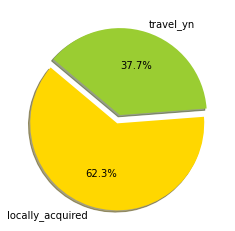

In [52]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

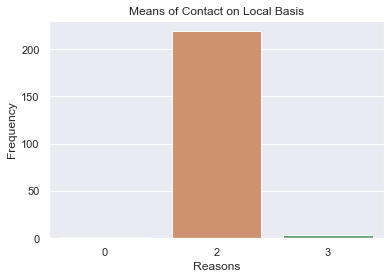

In [53]:
import seaborn as sns
Category_count = Covid_1['locally_acquired'].value_counts()#########
sns.set(style="darkgrid")
sns.barplot(Category_count.index, Category_count.values, alpha=0.9)
plt.title('Means of Contact on Local Basis')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Reasons', fontsize=12)
plt.show()

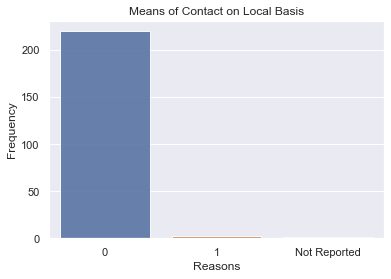

In [54]:
import seaborn as sns
Category_count = Covid_1['travel_yn'].value_counts()#######
sns.set(style="darkgrid")
sns.barplot(Category_count.index, Category_count.values, alpha=0.9)
plt.title('Means of Contact on Local Basis')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Reasons', fontsize=12)
plt.show()

In [55]:
print(Covid_2.isnull().values.sum())

print(Covid_2.isnull().sum())

59740
date_recovered              0
province                    0
cumulative_recovered     6960
province_source_x       13260
source_x                13260
date_testing                0
cumulative_testing        624
province_source_y       12792
source_y                12844
dtype: int64


In [56]:
Covid_2 = Covid_2.fillna(Covid_2['cumulative_recovered'].value_counts().index[0])
Covid_2 = Covid_2.fillna(Covid_2['province_source_x'].value_counts().index[0])
Covid_2 = Covid_2.fillna(Covid_2['source_x'].value_counts().index[0])
Covid_2 = Covid_2.fillna(Covid_2['cumulative_testing'].value_counts().index[0])
Covid_2 = Covid_2.fillna(Covid_2['province_source_y'].value_counts().index[0])
Covid_2 = Covid_2.fillna(Covid_2['source_y'].value_counts().index[0])

In [57]:
print(Covid_2.isnull().sum())

date_recovered          0
province                0
cumulative_recovered    0
province_source_x       0
source_x                0
date_testing            0
cumulative_testing      0
province_source_y       0
source_y                0
dtype: int64


In [58]:
Covid_2 = Covid_2.drop(['province_source_x', 'source_x','province_source_y','source_y'] , axis=1)

print(Covid_2)

      date_recovered province  cumulative_recovered date_testing  \
0         2020-04-03  Alberta                 196.0   03-04-2020   
1         2020-04-03  Alberta                 196.0   02-04-2020   
2         2020-04-03  Alberta                 196.0   01-04-2020   
3         2020-04-03  Alberta                 196.0   31-03-2020   
4         2020-04-03  Alberta                 196.0   30-03-2020   
...              ...      ...                   ...          ...   
13515     2020-02-12    Yukon                   0.0   19-03-2020   
13516     2020-02-12    Yukon                   0.0   18-03-2020   
13517     2020-02-12    Yukon                   0.0   17-03-2020   
13518     2020-02-12    Yukon                   0.0   16-03-2020   
13519     2020-02-12    Yukon                   0.0   15-03-2020   

       cumulative_testing  
0                 61960.0  
1                 57096.0  
2                 53141.0  
3                 48692.0  
4                 46057.0  
...            

In [59]:
Covid_2_sklearn = Covid_2.copy()
lb2 = LabelEncoder()
Covid_2_sklearn['date_recovered'] = lb2.fit_transform(Covid_2['date_recovered'])
Covid_2_sklearn.head()

Covid_2_sklearn['province'] = lb2.fit_transform(Covid_2['province'])
Covid_2_sklearn.head()

Covid_2_sklearn['cumulative_recovered'] = lb2.fit_transform(Covid_2['cumulative_recovered'])
Covid_2_sklearn.head()

Covid_2_sklearn['date_testing'] = lb2.fit_transform(Covid_2['date_testing'])
Covid_2_sklearn.head()

Covid_2_sklearn['cumulative_testing'] = lb2.fit_transform(Covid_2['cumulative_testing'])
Covid_2_sklearn.head()

,date_recovered,province,cumulative_recovered,date_testing,cumulative_testing
0,51,0,35,2,202
1,51,0,35,1,199
2,51,0,35,0,198
3,51,0,35,19,194
4,51,0,35,18,191


In [70]:
Covid_2_sklearn.tail()

,date_recovered,province,cumulative_recovered,date_testing,cumulative_testing
13515,0,12,0,7,25
13516,0,12,0,6,2
13517,0,12,0,5,0
13518,0,12,0,4,0
13519,0,12,0,3,0


In [60]:
X1 = Covid_2_sklearn.iloc[:, :-1].values 
Y1 = Covid_2_sklearn.iloc[:, -1].values

In [71]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=1)

In [62]:
sc_X = StandardScaler()
X1_train = sc_X.fit_transform(X1_train)
X1_test = sc_X.transform(X1_test)

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
regressor = RandomForestRegressor(n_estimators=20, random_state=1)
regressor.fit(X1_train, Y1_train)
y1_pred = regressor.predict(X1_test)

In [65]:
from sklearn import metrics

In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y1_test, y1_pred)))
print("********************************************")

Mean Absolute Error: 0.3166050295857989
Mean Squared Error: 6.80287290433925
Root Mean Squared Error: 2.608231758172431
********************************************


In [69]:
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X1_train, Y1_train)
y1_pred = regressor.predict(X1_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y1_test, y1_pred)))
print("********************************************")
y1_pred[-1]

Mean Absolute Error: 0.28588017751479283
Mean Squared Error: 6.365699605522683
Root Mean Squared Error: 2.5230338098255207
********************************************


112.0

In [67]:
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X1_train, Y1_train)
y1_pred = regressor.predict(X1_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(Y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y1_test, y1_pred)))
print("********************************************")

Mean Absolute Error: 0.2835387902695596
Mean Squared Error: 6.524169378698224
Root Mean Squared Error: 2.5542453638400175
********************************************


In [82]:
regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
regressor.fit(X1_train, Y1_train)
y1_pred = regressor.predict(X1_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(Y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y1_test, y1_pred)))
print("********************************************")


Mean Absolute Error: 0.2807931459566075
Mean Squared Error: 6.378327133382644
Root Mean Squared Error: 2.5255350192350616
********************************************


array([ 43., 145.,  44., ...,  12.,  51., 112.])

In [69]:
regressor = RandomForestRegressor(n_estimators=2000, random_state=0)
regressor.fit(X1_train, Y1_train)
y1_pred = regressor.predict(X1_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(Y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y1_test, y1_pred)))
print("********************************************")

Mean Absolute Error: 0.2783275394477317
Mean Squared Error: 6.302480379992604
Root Mean Squared Error: 2.5104741344998165
********************************************


In [70]:
regressor = RandomForestRegressor(n_estimators=3000, random_state=0)
regressor.fit(X1_train, Y1_train)
y1_pred = regressor.predict(X1_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(Y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y1_test, y1_pred)))
print("********************************************")

Mean Absolute Error: 0.2776826101249178
Mean Squared Error: 6.255434349934253
Root Mean Squared Error: 2.5010866338322337
********************************************


In [71]:
regressor = RandomForestRegressor(n_estimators=5000, random_state=0)
regressor.fit(X1_train, Y1_train)
y1_pred = regressor.predict(X1_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(Y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y1_test, y1_pred)))
print("********************************************")

Mean Absolute Error: 0.2766800788954635
Mean Squared Error: 6.2518259709467445
Root Mean Squared Error: 2.5003651675198855
********************************************


In [72]:
regressor = RandomForestRegressor(n_estimators=10000, random_state=0)
regressor.fit(X1_train, Y1_train)
y1_pred = regressor.predict(X1_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(Y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y1_test, y1_pred)))
print("********************************************")

Mean Absolute Error: 0.277914127218935
Mean Squared Error: 6.295057785036981
Root Mean Squared Error: 2.508995373657947
********************************************


In [73]:
import matplotlib. pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [74]:
############################################################################

In [75]:
x, y = make_classification(n_samples=1000,
                           n_features=5,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)
forest = ExtraTreesClassifier(n_estimators=2000,
                              random_state=0)

In [76]:
forest.fit(x, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [77]:
print("Feature ranking:")

Feature ranking:


In [78]:
for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 1 (0.355632)
2. feature 2 (0.285299)
3. feature 0 (0.235688)
4. feature 3 (0.062131)
5. feature 4 (0.061250)


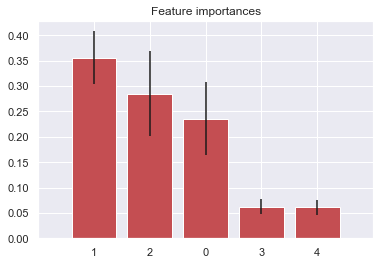

In [79]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(Covid_2_sklearn.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1,Covid_2_sklearn.shape[1]])
plt.show()

In [80]:
Covid_2_sklearn.columns

Index(['date_recovered', 'province', 'cumulative_recovered', 'date_testing',
       'cumulative_testing'],
      dtype='object')